In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from plotly.offline import iplot, init_notebook_mode
import collections as col

pd.options.display.max_columns = 500 
print (pd.options.display.max_columns)

500


In [2]:
df= pd.read_csv(r'C:\Users\asus\Desktop\Pacific.csv',encoding='cp1252')
df.head(4)

,REPORT_RECEIVED_DATE,IYEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,OPERATOR_ID,NAME,OPERATOR_STREET_ADDRESS,OPERATOR_CITY_NAME,OPERATOR_STATE_ABBREVIATION,OPERATOR_POSTAL_CODE,LOCAL_DATETIME,TIME_ZONE,DAYLIGHT_SAVINGS_IND,LOCATION_STREET_ADDRESS,LOCATION_CITY_NAME,LOCATION_COUNTY_NAME,LOCATION_STATE_ABBREVIATION,LOCATION_POSTAL_CODE,LOCATION_LATITUDE,LOCATION_LONGITUDE,NRC_RPT_NUM,ADDITIONAL_NRC_REPORT_NUMBERS,FLOW_CONT_KEY_CRIT_IND,FLOW_CONT_MAIN_VALVE_IND,FLOW_CONT_SERVICE_VALVE_IND,FLOW_CONT_METER_REG_IND,FLOW_CONT_EXCESS_FLOW_IND,FLOW_CONT_SQUEEZE_OFF_IND,FLOW_CONT_STOPPLE_FITNG_IND,FLOW_CONT_OTHER_IND,FLOW_CONT_OTHER_DETAIL,NRC_RPT_DATETIME,COMMODITY_RELEASED_TYPE,COMMODITY_DETAILS,UNINTENTIONAL_RELEASE,INTENTIONAL_RELEASE,FATALITY_IND,NUM_EMP_FATALITIES,NUM_CONTR_FATALITIES,NUM_ER_FATALITIES,NUM_WORKER_FATALITIES,NUM_GP_FATALITIES,FATAL,INJURY_IND,NUM_EMP_INJURIES,NUM_CONTR_INJURIES,NUM_ER_INJURIES,NUM_WORKER_INJURIES,NUM_GP_INJURIES,INJURE,IGNITE_IND,IGNITE_DATETIME,HOW_EXTINGUISHED,HOW_EXTINGUISHED_OTHER_DETAIL,GAS_CONSUMED_BY_FIRE_IN_MCF,EXPLODE_IND,NUM_PUB_EVACUATED,INCIDENT_IDENTIFIED_DATETIME,COMMUNICATION_STATE_FED_IND,PARTY_INITIATED_COMMUNICATION,INITIAL_RESPONDER_COM_DATETIME,ON_SITE_DATETIME,FEDERAL,LOCATION_TYPE,INCIDENT_AREA_TYPE,INCIDENT_AREA_SUBTYPE,INCIDENT_AREA_DETAILS,DEPTH_OF_COVER,OTHER_UNDERGROUND_FACILITIES,CROSSING,BRIDGE_CROSSING_IND,BRIDGE_TYPE,RAILROAD_CROSSING_IND,RAILROAD_TYPE,ROAD_CROSSING_IND,ROAD_TYPE,WATER_CROSSING_IND,WATER_TYPE,WATER_NAME,WATER_DEPTH,WATER_SUBTYPE,PIPE_FACILITY_TYPE,PIPE_TYPE_OTHER,SYSTEM_PART_INVOLVED,SYSTEM_PART_DETAILS,INSTALLATION_YEAR,MANUFACTURED_YEAR,CUSTOMER_TYPE,WAS_EFV_INSTALLED_BEFORE_IND,EVF_ACTIVATION_IND,CURB_VALVE_INST_BEFORE_INC_IND,PIPE_DIAMETER,PIPE_SPECIFICATION,PIPE_MANUFACTURER,MATERIAL_INVOLVED,MATERIAL_DETAILS,STEEL_SEAM_TYPE,STEEL_SEAM_TYPE_DETAILS,WT_STEEL,PLASTIC_TYPE,PLASTIC_DETAILS,PLASTIC_SDR,WT_PLASTIC,WT_PLASTIC_UNKNOWN_IND,MATERIAL_PE_PIPE_CODE,RELEASE_TYPE,PUNCTURE_AXIAL,PUNCTURE_CIRCUM,LEAK_TYPE,LEAK_TYPE_OTHER,RUPTURE_ORIENT,RUPTURE_DETAILS,RUPTURE_LENGTH,RUPTURE_WIDTH,RELEASE_TYPE_DETAILS,CLASS_LOCATION_TYPE,EST_COST_OPER_PAID,EST_COST_PROP_DAMAGE,EST_COST_EMERGENCY,EST_COST_OTHER,EST_COST_OTHER_DETAILS,GAS_COST_IN_MCF,EST_COST_UNINTENTIONAL_RELEASE,EST_COST_INTENTIONAL_RELEASE,PRPTY,COMMERCIAL_AFFECTED,INDUSTRIAL_AFFECTED,RESIDENCES_AFFECTED,NUM_PERSONS_HOSP_NOT_OVNGHT,NUM_INJURED_TREATED_BY_EMT,NUM_RESIDENT_BUILDING_AFFCTD,NUM_BUSINESS_BUILDING_AFFCTD,ACCIDENT_PSIG,NORMAL_PSIG,MOP_PSIG,MOP_CFR_SECTION,MAOP_ESTABLISHED_DATE,ACCIDENT_PRESSURE,GAS_ODORIZED_SYSTEM_TYPE,GAS_ODORIZED_SYS_OTHER_DETAIL,GAS_ODORIZED_LEVEL,GAS_ODORIZED_LVL_NOT_MSRD_IND,SCADA_IN_PLACE_IND,SCADA_OPERATING_IND,SCADA_FUNCTIONAL_IND,SCADA_DETECTION_IND,SCADA_CONF_IND,ACCIDENT_IDENTIFIER,ACCIDENT_DETAILS,OPERATOR_TYPE,INVESTIGATION_STATUS,INVESTIGATION_STATUS_DETAILS,INVEST_SCHEDULE_IND,INVEST_NO_SCHEDULE_IND,INVEST_NO_SCHEDULE_IND_DETAILS,INVEST_NO_CONTROL_ROOM_IND,INVEST_NO_CONTROLLER_IND,INVEST_INCORRECT_ACTION_IND,INVEST_FATIGUE_IND,INVEST_INCORRECT_PROCEDURE_IND,INVEST_INCORRECT_CONTROL_IND,INVEST_MAINT_IND,INVEST_OTHER_IND,INVEST_OTHER_IND_DETAILS,EMPLOYEE_DRUG_TEST_IND,NUM_EMPLOYEES_TESTED,NUM_EMPLOYEES_FAILED,CONTRACTOR_DRUG_TEST_IND,NUM_CONTRACTORS_TESTED,NUM_CONTRACTORS_FAILED,CAUSE,CAUSE_DETAILS,INTERNAL_EXTERNAL,VISUAL_EXAM_RESULTS,VISUAL_EXAM_DETAILS,GALVANIC_CORROSION_IND,ATMOSPHERE_CORROSION_IND,STRAY_CURRENT_CORROSION_IND,MICROBIOLOGICAL_CORROSION_IND,SELECTIVE_SEAM_CORROSION_IND,OTHER_CORROSION_IND,CORROSION_TYPE_DETAILS,STRAY_CURRENT_TYPE,STRAY_CURRENT_DETAILS,FIELD_EXAM_BASIS_IND,METALLURGICAL_BASIS_IND,OTHER_BASIS_IND,CORROSION_BASIS_DETAILS,UNDERGROUND_LOCATION,UNDER_CATHODIC_PROTECTION_IND,CATHODIC_PRO_START_YEAR,SHIELDING_EVIDENT,CATHODIC_SURVEY_TYPE,CP_ANNUAL_SURVEY_IND,CLOSE_INTERVAL_SURVEY_IND,OTHER_CP_SURVEY_IND,CP_ANNUAL_SURVEY_YEAR,CLOSE_INTERVAL_SURVEY_YEAR,OTHER_CP_SURVEY_YEAR,OTHER_CP_SURVEY_DETAILS,EXTERNALLY_COATED,PRIOR_DAMA

# Some Analysis

In [3]:
df.shape

(80, 458)

In [21]:
df[['COMMERCIAL_AFFECTED','INDUSTRIAL_AFFECTED','RESIDENCES_AFFECTED' ,'PRPTY']].describe()

,COMMERCIAL_AFFECTED,INDUSTRIAL_AFFECTED,RESIDENCES_AFFECTED,PRPTY
count,80.000000,80.00000,80.000000,8.000000e+01
mean,29.050000,0.02500,256.687500,4.552455e+06
std,123.184322,0.15711,1292.730332,3.478319e+07
min,0.000000,0.00000,0.000000,2.000000e+03
25%,0.000000,0.00000,1.000000,5.628800e+04
50%,0.000000,0.00000,2.000000,1.036500e+05
75%,1.000000,0.00000,32.750000,3.020000e+05
max,768.000000,1.00000,11216.000000,3.110055e+08


__count of Causes__

In [57]:
print('Main Causes of Failur')
col.Counter(df['CAUSE'].values)


Main Causes of Failur


Counter({'OTHER OUTSIDE FORCE DAMAGE': 37,
         'NATURAL FORCE DAMAGE': 4,
         'EXCAVATION DAMAGE': 27,
         'EQUIPMENT FAILURE': 3,
         'CORROSION FAILURE': 2,
         'INCORRECT OPERATION': 3,
         'MATERIAL FAILURE OF PIPE OR WELD': 4})

In [58]:
print('number of injury',df['INJURY_IND'].unique())
df['INJURY_IND'].value_counts()


number of injury ['NO' 'YES']


NO     74
YES     6
Name: INJURY_IND, dtype: int64

In [59]:
print('Did the gas ignite?')
df['IGNITE_IND'].value_counts()

Did the gas ignite?


YES    44
NO     36
Name: IGNITE_IND, dtype: int64

In [60]:
print('Area of Incident (specify)')
df['INCIDENT_AREA_SUBTYPE'].value_counts()

Area of Incident (specify)


"TYPICAL ABOVEGROUND FACILITY PIPING OR APPURTENANCE (E.G. VALUE OR REGULATOR STATION, OUTDOOR METER SET)"    32
UNDER PAVEMENT                                                                                                15
UNDER SOIL                                                                                                    14
EXPOSED DUE TO EXCAVATION                                                                                      8
UNDER A BUILDING                                                                                               4
IN UNDERGROUND ENCLOSED SPACE (E.G. VAULT)                                                                     2
INSIDE A BUILDING                                                                                              2
OTHER                                                                                                          1
Name: INCIDENT_AREA_SUBTYPE, dtype: int64

__information about the greatest Total cost__

In [61]:
df.loc[df['PRPTY'].idxmax()]


REPORT_RECEIVED_DATE                                            12/5/2018
IYEAR                                                                2018
REPORT_NUMBER                                                    20180112
SUPPLEMENTAL_NUMBER                                                 34099
REPORT_TYPE                                            SUPPLEMENTAL FINAL
                                              ...                        
AUTHORIZER_NAME                                            SUSIE RICHMOND
AUTHORIZER_TITLE            MANAGER OF GAS OPERATIONS COMPLIANCE AND RISK
AUTHORIZER_TELEPHONE                                         925-328-5776
AUTHORIZER_EMAIL                                             gsr8@pge.com
NARRATIVE               "ON THURSDAY, NOVEMBER 8, 2018, AT APPROXIMATE...
Name: 4, Length: 458, dtype: object

# Visualization

In [4]:
def plotPerColumnDistribution(df,nGraphShown,nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()    
    

<ipython-input-4-14c1e134a7a4>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-4-14c1e134a7a4>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-4-14c1e134a7a4>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-4-14c1e134a7a4>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-4-14c1e134a7a4>:9: Ma

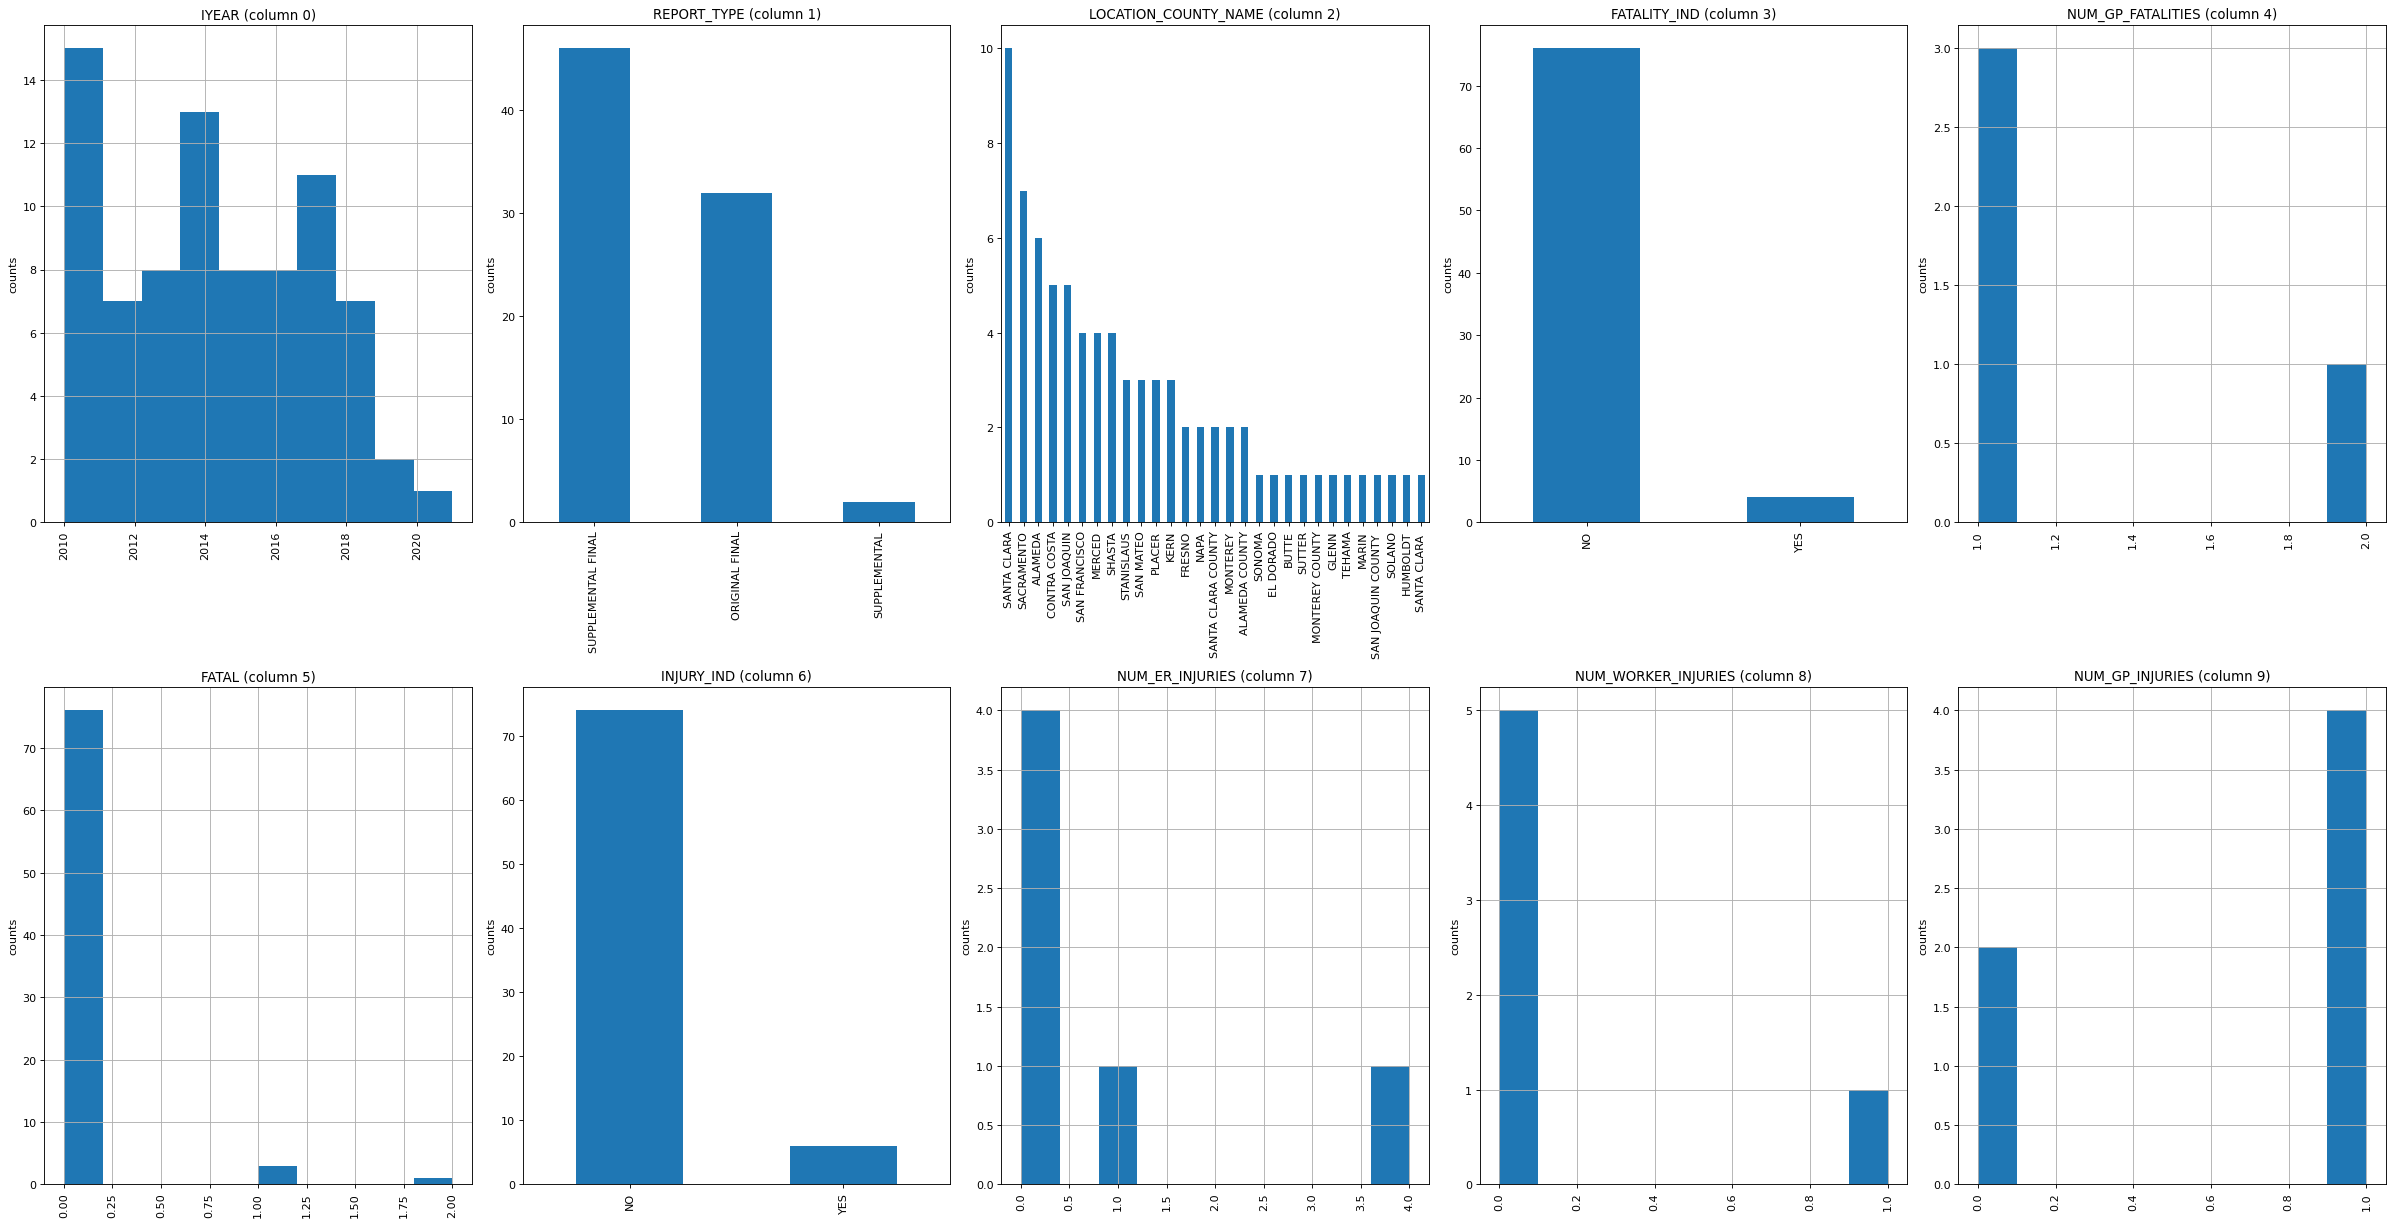

In [5]:
plotPerColumnDistribution(df,10,5)

In [10]:
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

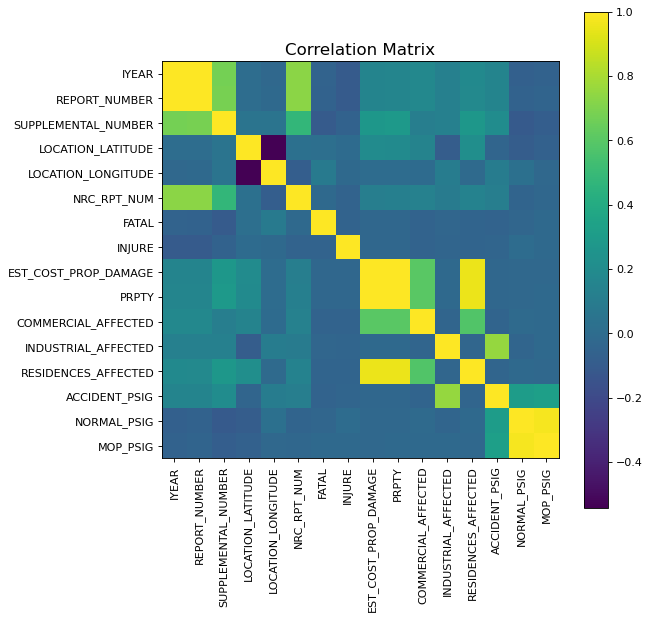

In [11]:
plotCorrelationMatrix(df, 8)

In [12]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

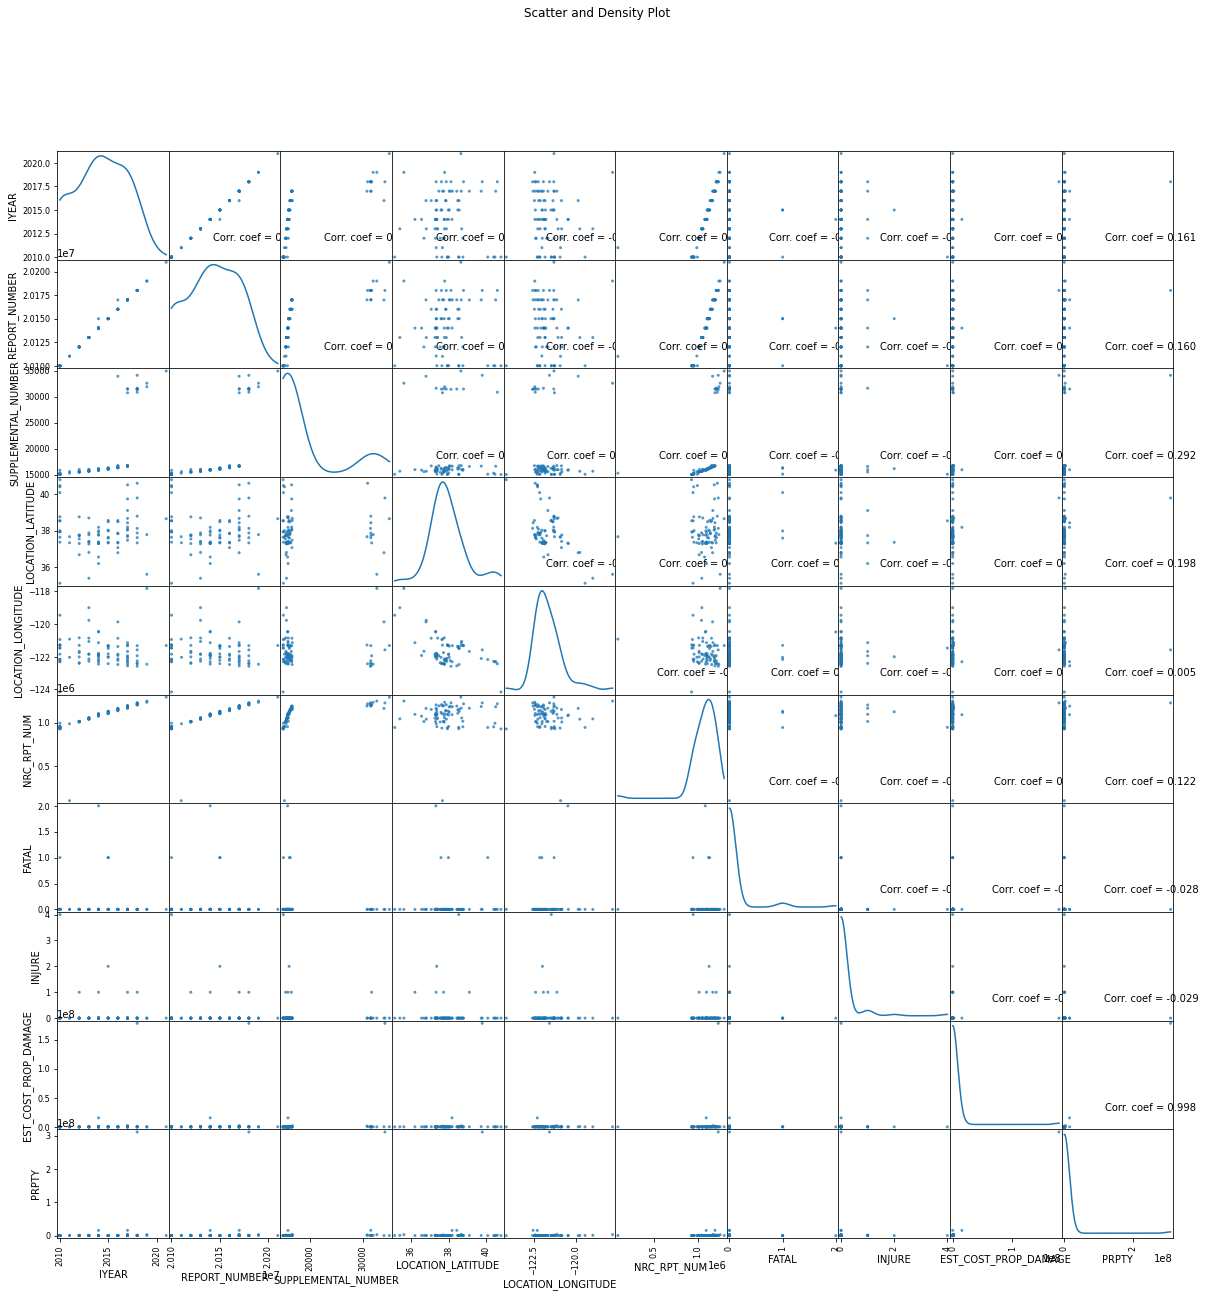

In [14]:
plotScatterMatrix(df, 20, 10)

In [53]:
#### MOST COMMON Leakage CAUSES
DDD = col.Counter(df['CAUSE'].values)
ids2 = [x[0] for x in DDD.most_common(20)]

hXvalue2 = []
hValues2 = []
hLabels2 = []
for j, i  in enumerate(ids2):
    hXvalue2.append(j+1)
    hValues2.append(DDD[i])
    hLabels2.append(i)    


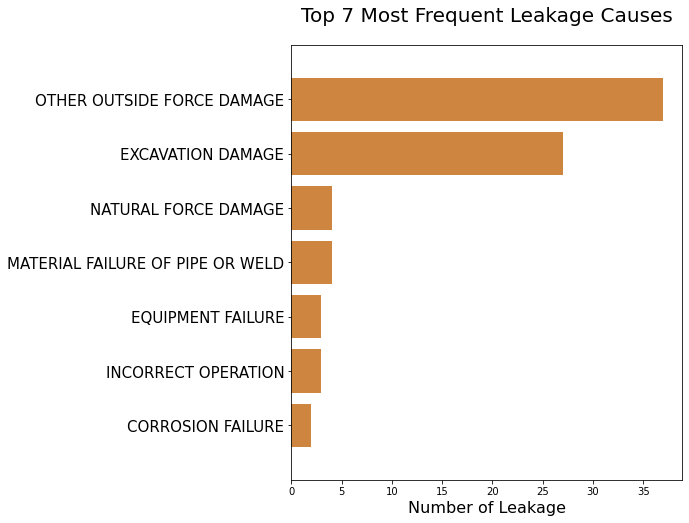

In [62]:
fig = plt.figure(figsize=(7, 8))
plt.barh(hXvalue2[::-1], hValues2, align='center', color='peru')
plt.ylim([0,len(hValues2)+1])
plt.title('Top 7 Most Frequent Leakage Causes', fontsize=20, y=1.04)
y = plt.yticks(hXvalue2[::-1], hLabels2, fontsize=15)
x = plt.xlabel('Number of Leakage', fontsize=16)
x2 = plt.xticks(fontsize=10)

<AxesSubplot:xlabel='MATERIAL_INVOLVED', ylabel='count'>

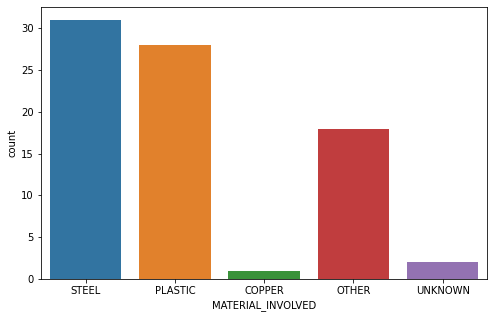

In [43]:
#Material involved in Incident
import matplotlib.pyplot as plt
import seaborn as sns
dim=(8,5)
fig,ax = plt.subplots(figsize=dim)
sns.countplot(x='MATERIAL_INVOLVED', ax=ax, data=df)

<AxesSubplot:xlabel='RELEASE_TYPE', ylabel='count'>

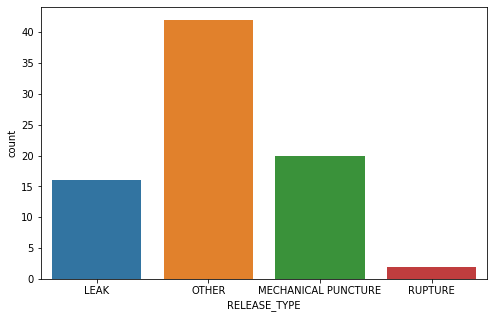

In [45]:
#Type of release involved
dim=(8,5)
fig,ax = plt.subplots(figsize=dim)
sns.countplot(x='RELEASE_TYPE', ax=ax, data=df)

<AxesSubplot:xlabel='CAUSE', ylabel='count'>

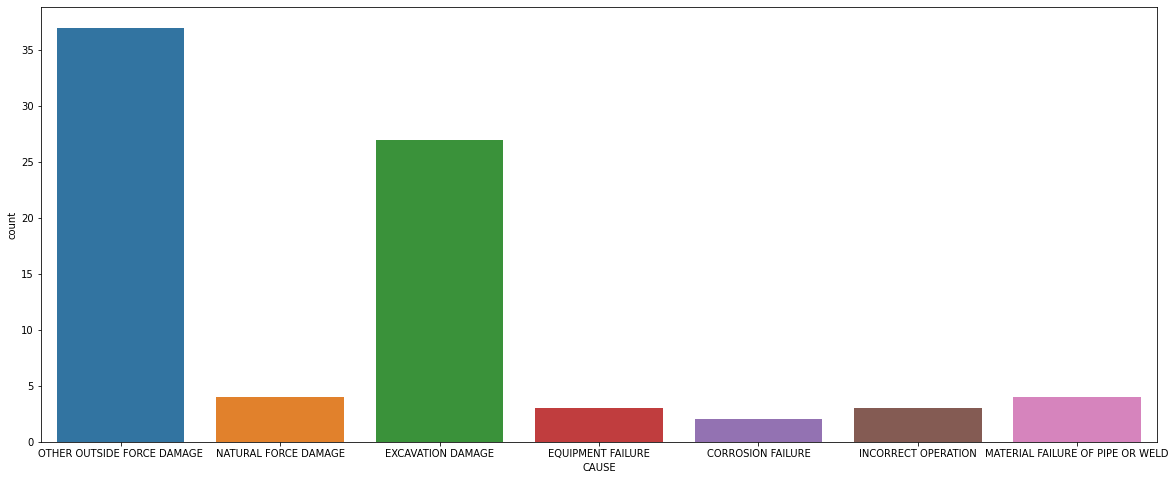

In [48]:
dim=(20,8)
fig,ax = plt.subplots(figsize=dim)
sns.countplot(x='CAUSE', ax=ax, data=df)

<AxesSubplot:xlabel='INCIDENT_AREA_TYPE', ylabel='count'>

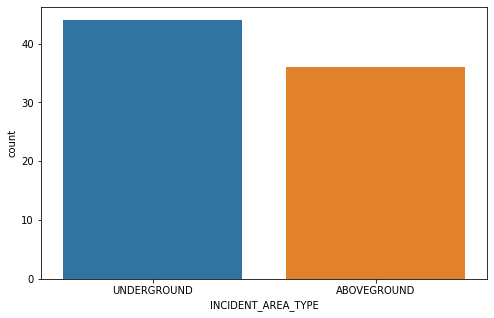

In [66]:
dim=(8,5)
fig,ax = plt.subplots(figsize=dim)
sns.countplot(x='INCIDENT_AREA_TYPE', ax=ax, data=df)
